# HERE CALIBRATE PICTURES EXAMPLE

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

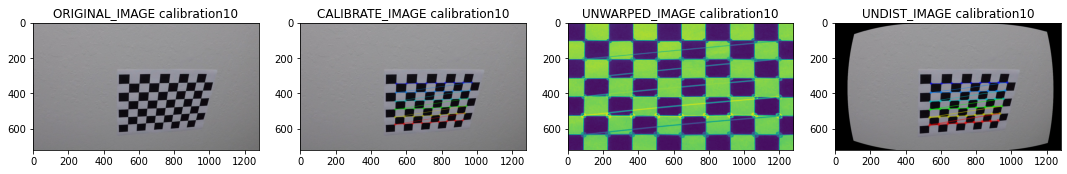

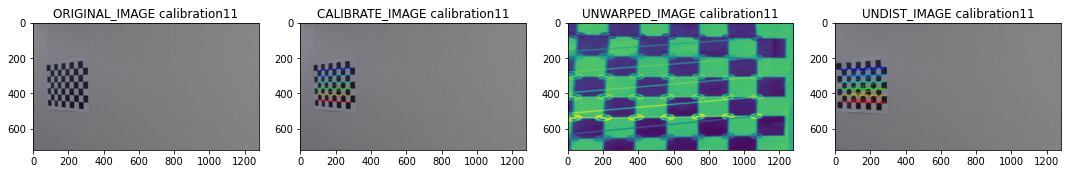

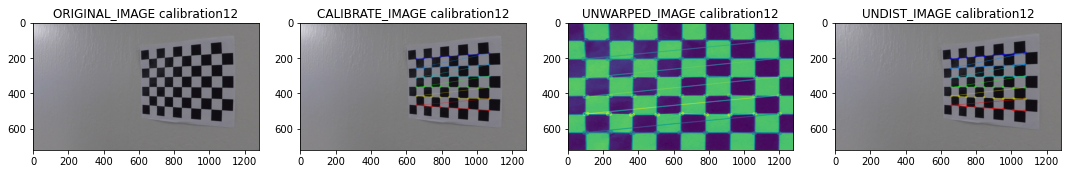

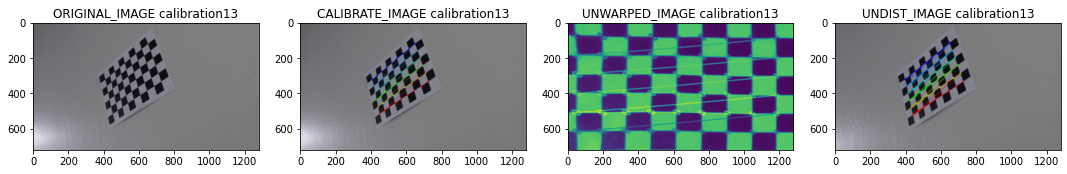

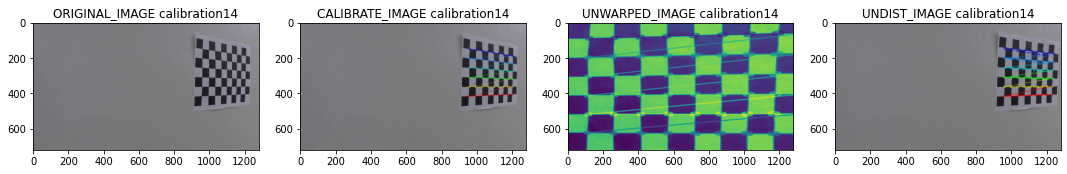

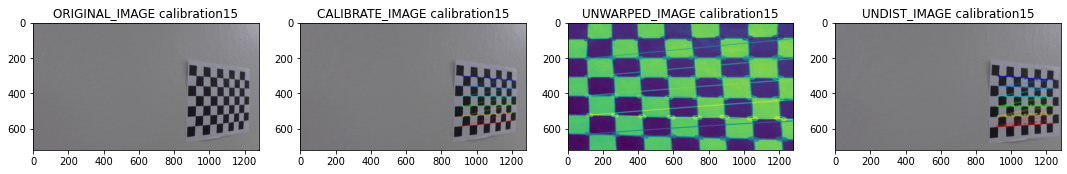

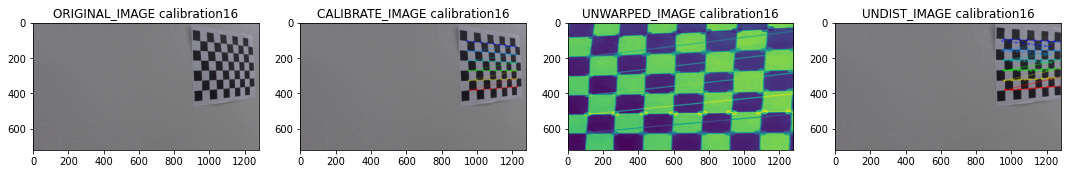

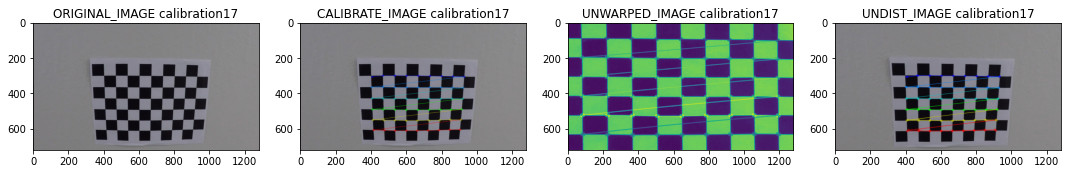

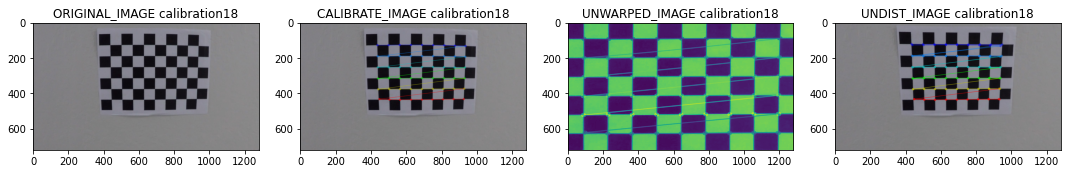

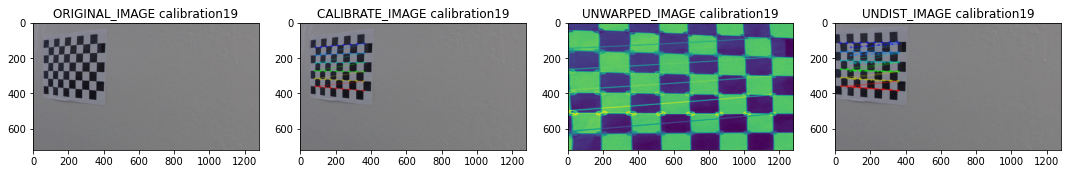

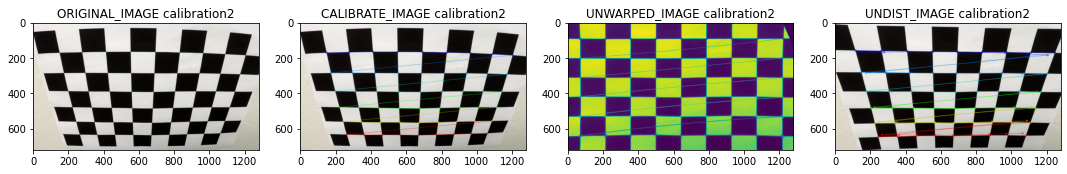

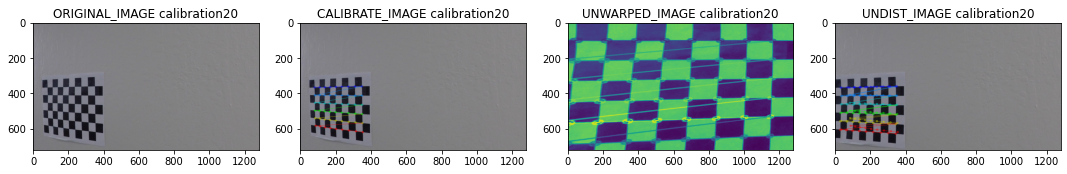

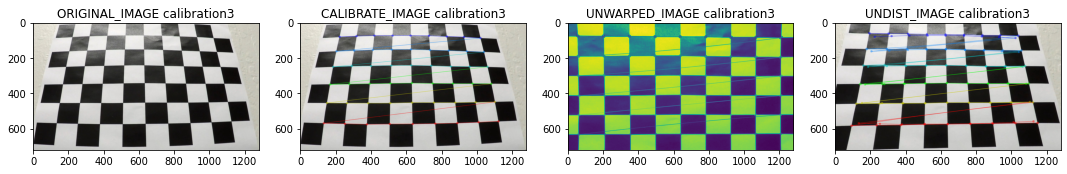

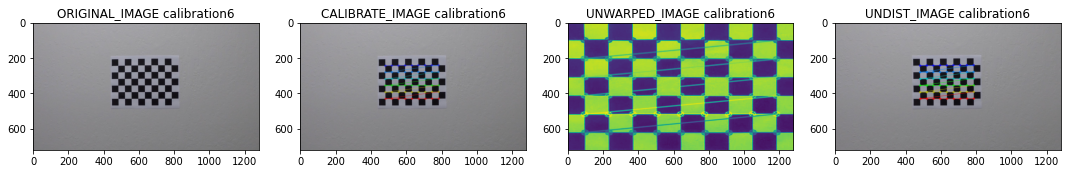

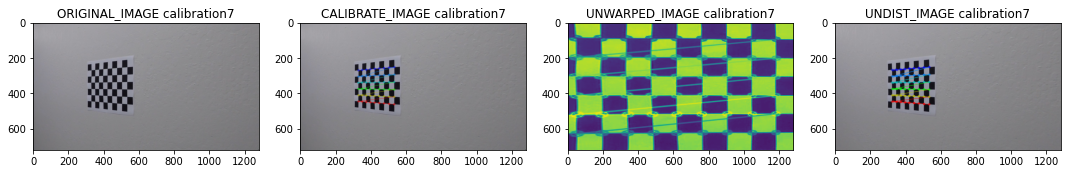

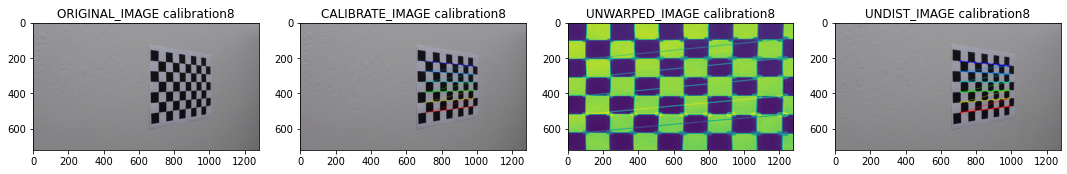

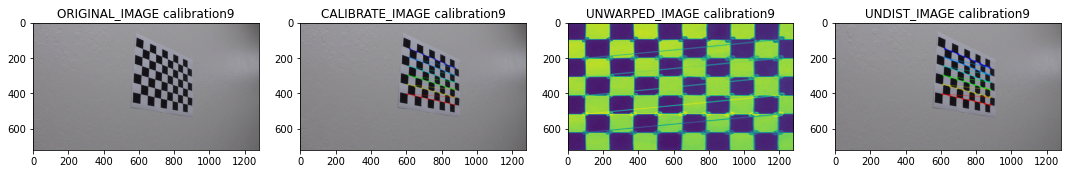

In [2]:
def calibrate(nx, ny):
    
    objpoints = []
    imgpoints = []
    
    objp = np.zeros((ny*nx,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

    paths = os.getcwd()+'/camera_cal'
    files = os.listdir(paths)

    for num, fname in enumerate(files):

        img = mpimg.imread('./camera_cal/'+fname)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)
            retur, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

            origin = np.copy(img)
            draw_corners = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)

            undist = cv2.undistort(img, mtx, dist, None, mtx)
            gray = cv2.cvtColor(undist, cv2.COLOR_RGB2GRAY)
            cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
            image_size = (gray.shape[1], gray.shape[0])
            offset = 100
            src = np.float32([corners[0], 
                            corners[nx-1], 
                            corners[-1], 
                            corners[-nx]])

            dst = np.float32([[offset, offset],
                            [image_size[0]-offset, offset],
                            [image_size[0]-offset, image_size[1]-offset],
                            [offset, image_size[1]-offset]])
            M = cv2.getPerspectiveTransform(src,dst)
            Minv = cv2.getPerspectiveTransform(src,dst)
            unwarped = cv2.warpPerspective(gray, M, image_size)

            fig, axs = plt.subplots(1, 4, figsize=(15, 20))
            fig.tight_layout()

            axs[0].imshow(origin)
            axs[0].set_title("ORIGINAL_IMAGE " + fname.split('.')[0])
            axs[1].imshow(draw_corners)
            axs[1].set_title("CALIBRATE_IMAGE " + fname.split('.')[0])
            axs[2].imshow(unwarped)
            axs[2].set_title("UNWARPED_IMAGE " + fname.split('.')[0])
            axs[3].imshow(undist)
            axs[3].set_title("UNDIST_IMAGE " + fname.split('.')[0])

            
calibrate(9, 6)